In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Dataset

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/ece-data-reduced.csv')
data.head()

MATAVERAGE  ECEAVERAGE  ELEAVERAGE  VR Passer
0        2.70       2.925    2.750000   A     NO
1        2.90       2.650    2.333333   A     NO
2        1.58       1.725    1.333333  AA    YES
3        2.43       2.725    2.416667  AA    YES
4        2.25       2.375    2.500000   A     NO

## Data Preprocessing

### Missing Data Check

In [ ]:
#Check for missing data
data.isnull().sum()

MATAVERAGE    0
ECEAVERAGE    0
ELEAVERAGE    0
VR            0
Passer        0
dtype: int64

## Scaling

In [ ]:
#Do you need to scale the data of you are using Random Forest?

#No

# Exploratory Data Analysis

In [ ]:
#Creating a summary for numerical data
data.select_dtypes(include=['float64', 'int64']).describe()


MATAVERAGE  ECEAVERAGE  ELEAVERAGE
count  500.000000  500.000000  500.000000
mean     2.345620    2.462410    2.273340
std      0.375316    0.394777    0.468253
min      1.150000    1.175000    1.083333
25%      2.122500    2.200000    1.916667
50%      2.430000    2.550000    2.333333
75%      2.650000    2.781250    2.666667
max      2.900000    3.000000    3.000000

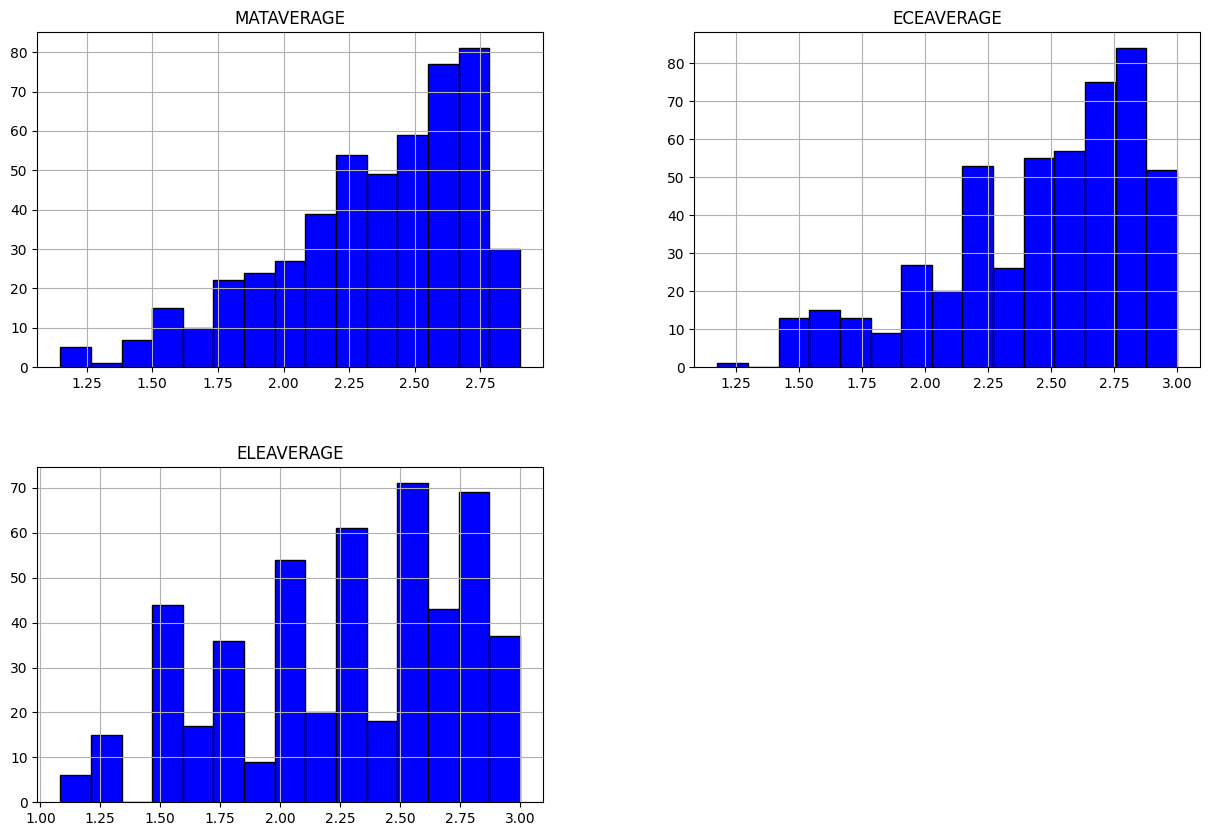

In [ ]:
#Plotting histograms for all numerical columns (bins = 15, figsize = (15,10), color = 'blue', edgecolor= 'bllack')

data.hist(column = ['MATAVERAGE', 'ECEAVERAGE', 'ELEAVERAGE'], bins = 15, figsize = (15, 10), color = 'blue', edgecolor = 'black')
plt.show()

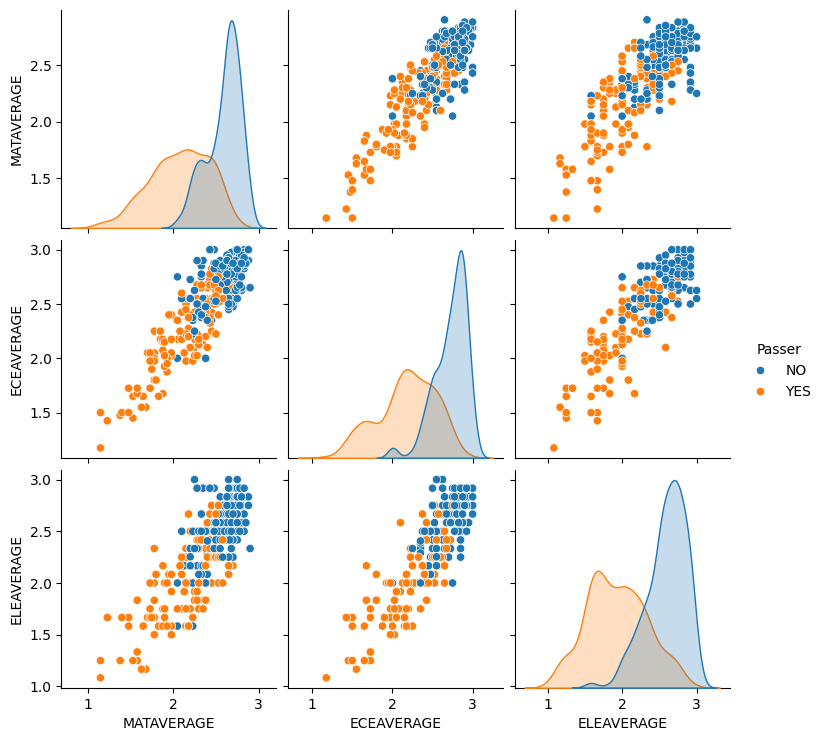

In [ ]:
#The paiplot with a hue based on the target class 'Passer'

sns.pairplot(data, hue = 'Passer')
plt.show()

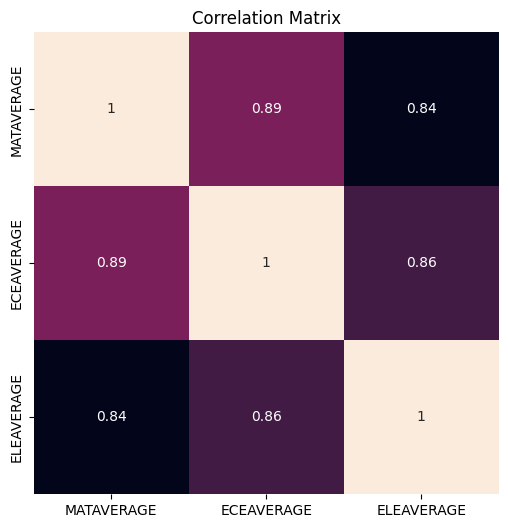

In [ ]:
#Correlation Matrix Heatmap .corr(), figsize = (6,6)

plt.subplots(figsize = (6,6))
sns.heatmap(data.corr(numeric_only = True), annot = True, cbar = False,
            xticklabels =  ['MATAVERAGE', 'ECEAVERAGE', 'ELEAVERAGE'], yticklabels =  ['MATAVERAGE', 'ECEAVERAGE', 'ELEAVERAGE']).set(title = 'Correlation Matrix')
plt.show()

In [ ]:
import plotly.express as px

px.scatter_3d(data, x = 'ECEAVERAGE', y = 'MATAVERAGE', z = 'ELEAVERAGE', color = 'Passer')

# Label Encoding (Dummies)

In [ ]:
#Encode Labels, do not use drop_first = True

#Assign X

X = pd.get_dummies(data.drop('Passer', axis=1), dtype= int)
X

MATAVERAGE  ECEAVERAGE  ELEAVERAGE  VR_A  VR_AA  VR_BA
0          2.70       2.925    2.750000     1      0      0
1          2.90       2.650    2.333333     1      0      0
2          1.58       1.725    1.333333     0      1      0
3          2.43       2.725    2.416667     0      1      0
4          2.25       2.375    2.500000     1      0      0
..          ...         ...         ...   ...    ...    ...
495        2.10       2.600    2.250000     0      1      0
496        2.20       2.550    2.253333     1      0      0
497        1.15       1.175    1.083333     0      1      0
498        2.33       2.400    2.500000     1      0      0
499        1.48       1.500    1.583333     0      1      0

[500 rows x 6 columns]

In [ ]:
y = data["Passer"]
y

0       NO
1       NO
2      YES
3      YES
4       NO
      ... 
495    YES
496     NO
497    YES
498     NO
499    YES
Name: Passer, Length: 500, dtype: object

In [ ]:
# test_size = 0.30, random_state = 101

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

# Initial Random Forest Classifier

In [ ]:
# Train with only random_state = 101

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 101)
model

RandomForestClassifier(random_state=101)

In [ ]:
# Initial Predictions

model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array(['NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO',
       'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES',
       'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES',
       'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES',
       'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'YES', 'YES', 'NO',
       'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO',
       'NO', 'YES', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'YES',
       'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'YES',
       'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO

In [ ]:
# Classification Report

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))

# Accuracy:
# The model achieved an accuracy of approximately 97% on the test set.
# This is a high rate, indicating that the model was able to classify the majority of the test instances correctly.

# Precision:
# The model has a precision of 96% for 'NO' and 99 for 'YES'.
# This means it is highly reliable in it predictions.

# Recall:
# The recall is 99% for 'NO' and 96% for 'YES',
# indicating that the model is able to identify most of the actual 'NO' and 'YES' cases.

# F1-Score:
# The F1-scores are 97% for both classes, which is a balance between precision nad recall,
# indicating a well-preforming model.

              precision    recall  f1-score   support

          NO       0.96      0.99      0.97        70
         YES       0.99      0.96      0.97        80

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



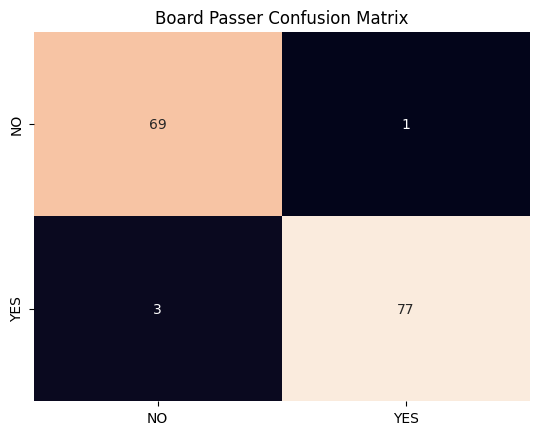

In [ ]:
# Confusion Matrix, heatmap with cbar = Falase

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, cbar = False, fmt = 'd',
            xticklabels = ['NO', 'YES'],
            yticklabels = ['NO', 'YES']).set(title = 'Board Passer Confusion Matrix')
plt.show()

# Model Optimization via GridSearch

In [ ]:
# List of Configuration

n_estimators = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200]
max_features = [1, 2, 3, 4, 5]
bootstrap = [True]
oob_score = [True]

In [ ]:
# Parameter Grids

param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'bootstrap': bootstrap,
              'oob_score': oob_score}

In [ ]:
# Perform a Grid Search with random_state = 101

from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state = 101)
grid = GridSearchCV(model, param_grid)

In [ ]:
# Fit GridSearch Values

grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=101),
             param_grid={'bootstrap': [True], 'max_features': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 200],
                         'oob_score': [True]})

In [ ]:
# What are the best parameters based on GridSearchCV

grid.best_params_

{'bootstrap': True, 'max_features': 3, 'n_estimators': 50, 'oob_score': True}

In [ ]:
# Feature Importances, Supply the best Parameters based on Grid Search and random_state = 9

model = RandomForestClassifier(bootstrap = True, max_features = 3, n_estimators = 50, oob_score = True, random_state = 9)

model.fit(X_train, y_train)

importance = model.feature_importances_
feature_names = X.columns

pd.DataFrame(importance, feature_names, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

Importance
VR_AA         0.307010
VR_A          0.272800
ECEAVERAGE    0.159688
MATAVERAGE    0.149524
ELEAVERAGE    0.110601
VR_BA         0.000378

In [ ]:
# Prediciton based on the optimized RF model

predictions = grid.predict(X_test)
predictions

array(['NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO',
       'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES',
       'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES',
       'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES',
       'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'YES', 'YES', 'NO',
       'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO',
       'NO', 'YES', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'YES',
       'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'YES',
       'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO'

In [ ]:
# Classification Report based on Grid Search

print(classification_report(y_test, predictions))

# As you can see, there is no notable imporvement at all

              precision    recall  f1-score   support

          NO       0.95      0.99      0.97        70
         YES       0.99      0.95      0.97        80

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



[Text(0.5, 1.0, 'Board Passer Confusion Matrix')]

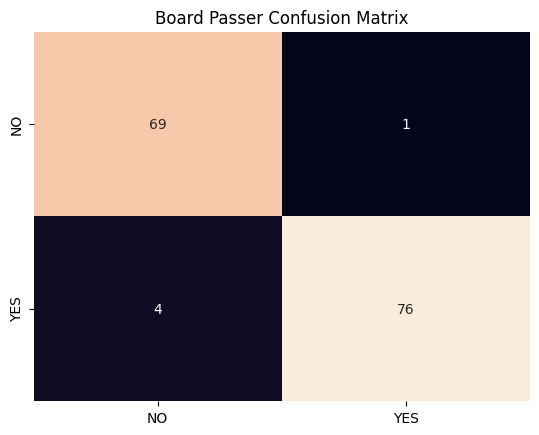

In [ ]:
# Confusion Matrix of the Optimize Model, heatmap with cbar = False

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, cbar = False, fmt = 'd',
            xticklabels = ['NO', 'YES'],
            yticklabels = ['NO', 'YES']).set(title = 'Board Passer Confusion Matrix')


# As you can see, there is no notable improvement at all
# It means that the initial Random Forest is already good on classification

In [ ]:
# RF (Text Representation - Simple)

from sklearn import tree

for i in range(0, len(model.estimators_)):

  text_representation = tree.export_text(model.estimators_[i], feature_names = ['MATAVERAGE','ECEAVERAGE','ELEAVERAGE','VR_A','VR_AA','VR_BA'])
  print('{}:'.format(i))
  print(text_representation)

0:
|--- ELEAVERAGE <= 2.29
|   |--- MATAVERAGE <= 2.55
|   |   |--- VR_AA <= 0.50
|   |   |   |--- ELEAVERAGE <= 1.79
|   |   |   |   |--- class: 1.0
|   |   |   |--- ELEAVERAGE >  1.79
|   |   |   |   |--- MATAVERAGE <= 2.25
|   |   |   |   |   |--- ECEAVERAGE <= 2.29
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- ECEAVERAGE >  2.29
|   |   |   |   |   |   |--- MATAVERAGE <= 2.22
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- MATAVERAGE >  2.22
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- MATAVERAGE >  2.25
|   |   |   |   |   |--- class: 0.0
|   |   |--- VR_AA >  0.50
|   |   |   |--- ELEAVERAGE <= 2.12
|   |   |   |   |--- class: 1.0
|   |   |   |--- ELEAVERAGE >  2.12
|   |   |   |   |--- ELEAVERAGE <= 2.21
|   |   |   |   |   |--- MATAVERAGE <= 2.20
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- MATAVERAGE >  2.20
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- ELEAVERAGE >  2.21
|   |  

In [ ]:
# RF (Text Representation - With Class Mapping, Notice the class it is now 'NO' or 'YES', not 0.0 or 1.0)

from sklearn import tree

# Define a mapping from numerical class values to labels
class_mapping = {0.0:'NO', 1.0:'YES'}

for i in range(0, len(model.estimators_)):

  text_representation = tree.export_text(model.estimators_[i], feature_names = ['MATAVERAGE','ECEAVERAGE','ELEAVERAGE','VR_A','VR_AA','VR_BA'])

  # Replace numerical class values with descriptive labels
  for numeric_class, label in class_mapping.items():

    text_representation = text_representation.replace(str(numeric_class), label)

  print('{}:' .format(i))
  print(text_representation)

0:
|--- ELEAVERAGE <= 2.29
|   |--- MATAVERAGE <= 2.55
|   |   |--- VR_AA <= 0.50
|   |   |   |--- ELEAVERAGE <= 1.79
|   |   |   |   |--- class: YES
|   |   |   |--- ELEAVERAGE >  1.79
|   |   |   |   |--- MATAVERAGE <= 2.25
|   |   |   |   |   |--- ECEAVERAGE <= 2.29
|   |   |   |   |   |   |--- class: YES
|   |   |   |   |   |--- ECEAVERAGE >  2.29
|   |   |   |   |   |   |--- MATAVERAGE <= 2.22
|   |   |   |   |   |   |   |--- class: NO
|   |   |   |   |   |   |--- MATAVERAGE >  2.22
|   |   |   |   |   |   |   |--- class: NO
|   |   |   |   |--- MATAVERAGE >  2.25
|   |   |   |   |   |--- class: NO
|   |   |--- VR_AA >  0.50
|   |   |   |--- ELEAVERAGE <= 2.12
|   |   |   |   |--- class: YES
|   |   |   |--- ELEAVERAGE >  2.12
|   |   |   |   |--- ELEAVERAGE <= 2.21
|   |   |   |   |   |--- MATAVERAGE <= 2.20
|   |   |   |   |   |   |--- class: YES
|   |   |   |   |   |--- MATAVERAGE >  2.20
|   |   |   |   |   |   |--- class: NO
|   |   |   |   |--- ELEAVERAGE >  2.21
|   |   |  

[Text(0.47297297297297297, 0.9545454545454546, 'ELEAVERAGE <= 2.292\ngini = 0.5\nsamples = 224\nvalue = [176, 174]\nclass = NO'),
 Text(0.20270270270270271, 0.8636363636363636, 'MATAVERAGE <= 2.555\ngini = 0.274\nsamples = 108\nvalue = [28, 143]\nclass = YES'),
 Text(0.10810810810810811, 0.7727272727272727, 'VR_AA <= 0.5\ngini = 0.165\nsamples = 99\nvalue = [14, 140]\nclass = YES'),
 Text(0.05405405405405406, 0.6818181818181818, 'ELEAVERAGE <= 1.792\ngini = 0.432\nsamples = 11\nvalue = [13, 6]\nclass = NO'),
 Text(0.02702702702702703, 0.5909090909090909, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = YES'),
 Text(0.08108108108108109, 0.5909090909090909, 'MATAVERAGE <= 2.255\ngini = 0.36\nsamples = 9\nvalue = [13, 4]\nclass = NO'),
 Text(0.05405405405405406, 0.5, 'ECEAVERAGE <= 2.287\ngini = 0.463\nsamples = 5\nvalue = [7, 4]\nclass = NO'),
 Text(0.02702702702702703, 0.4090909090909091, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = YES'),
 Text(0.08108108108108109, 0.409090909090

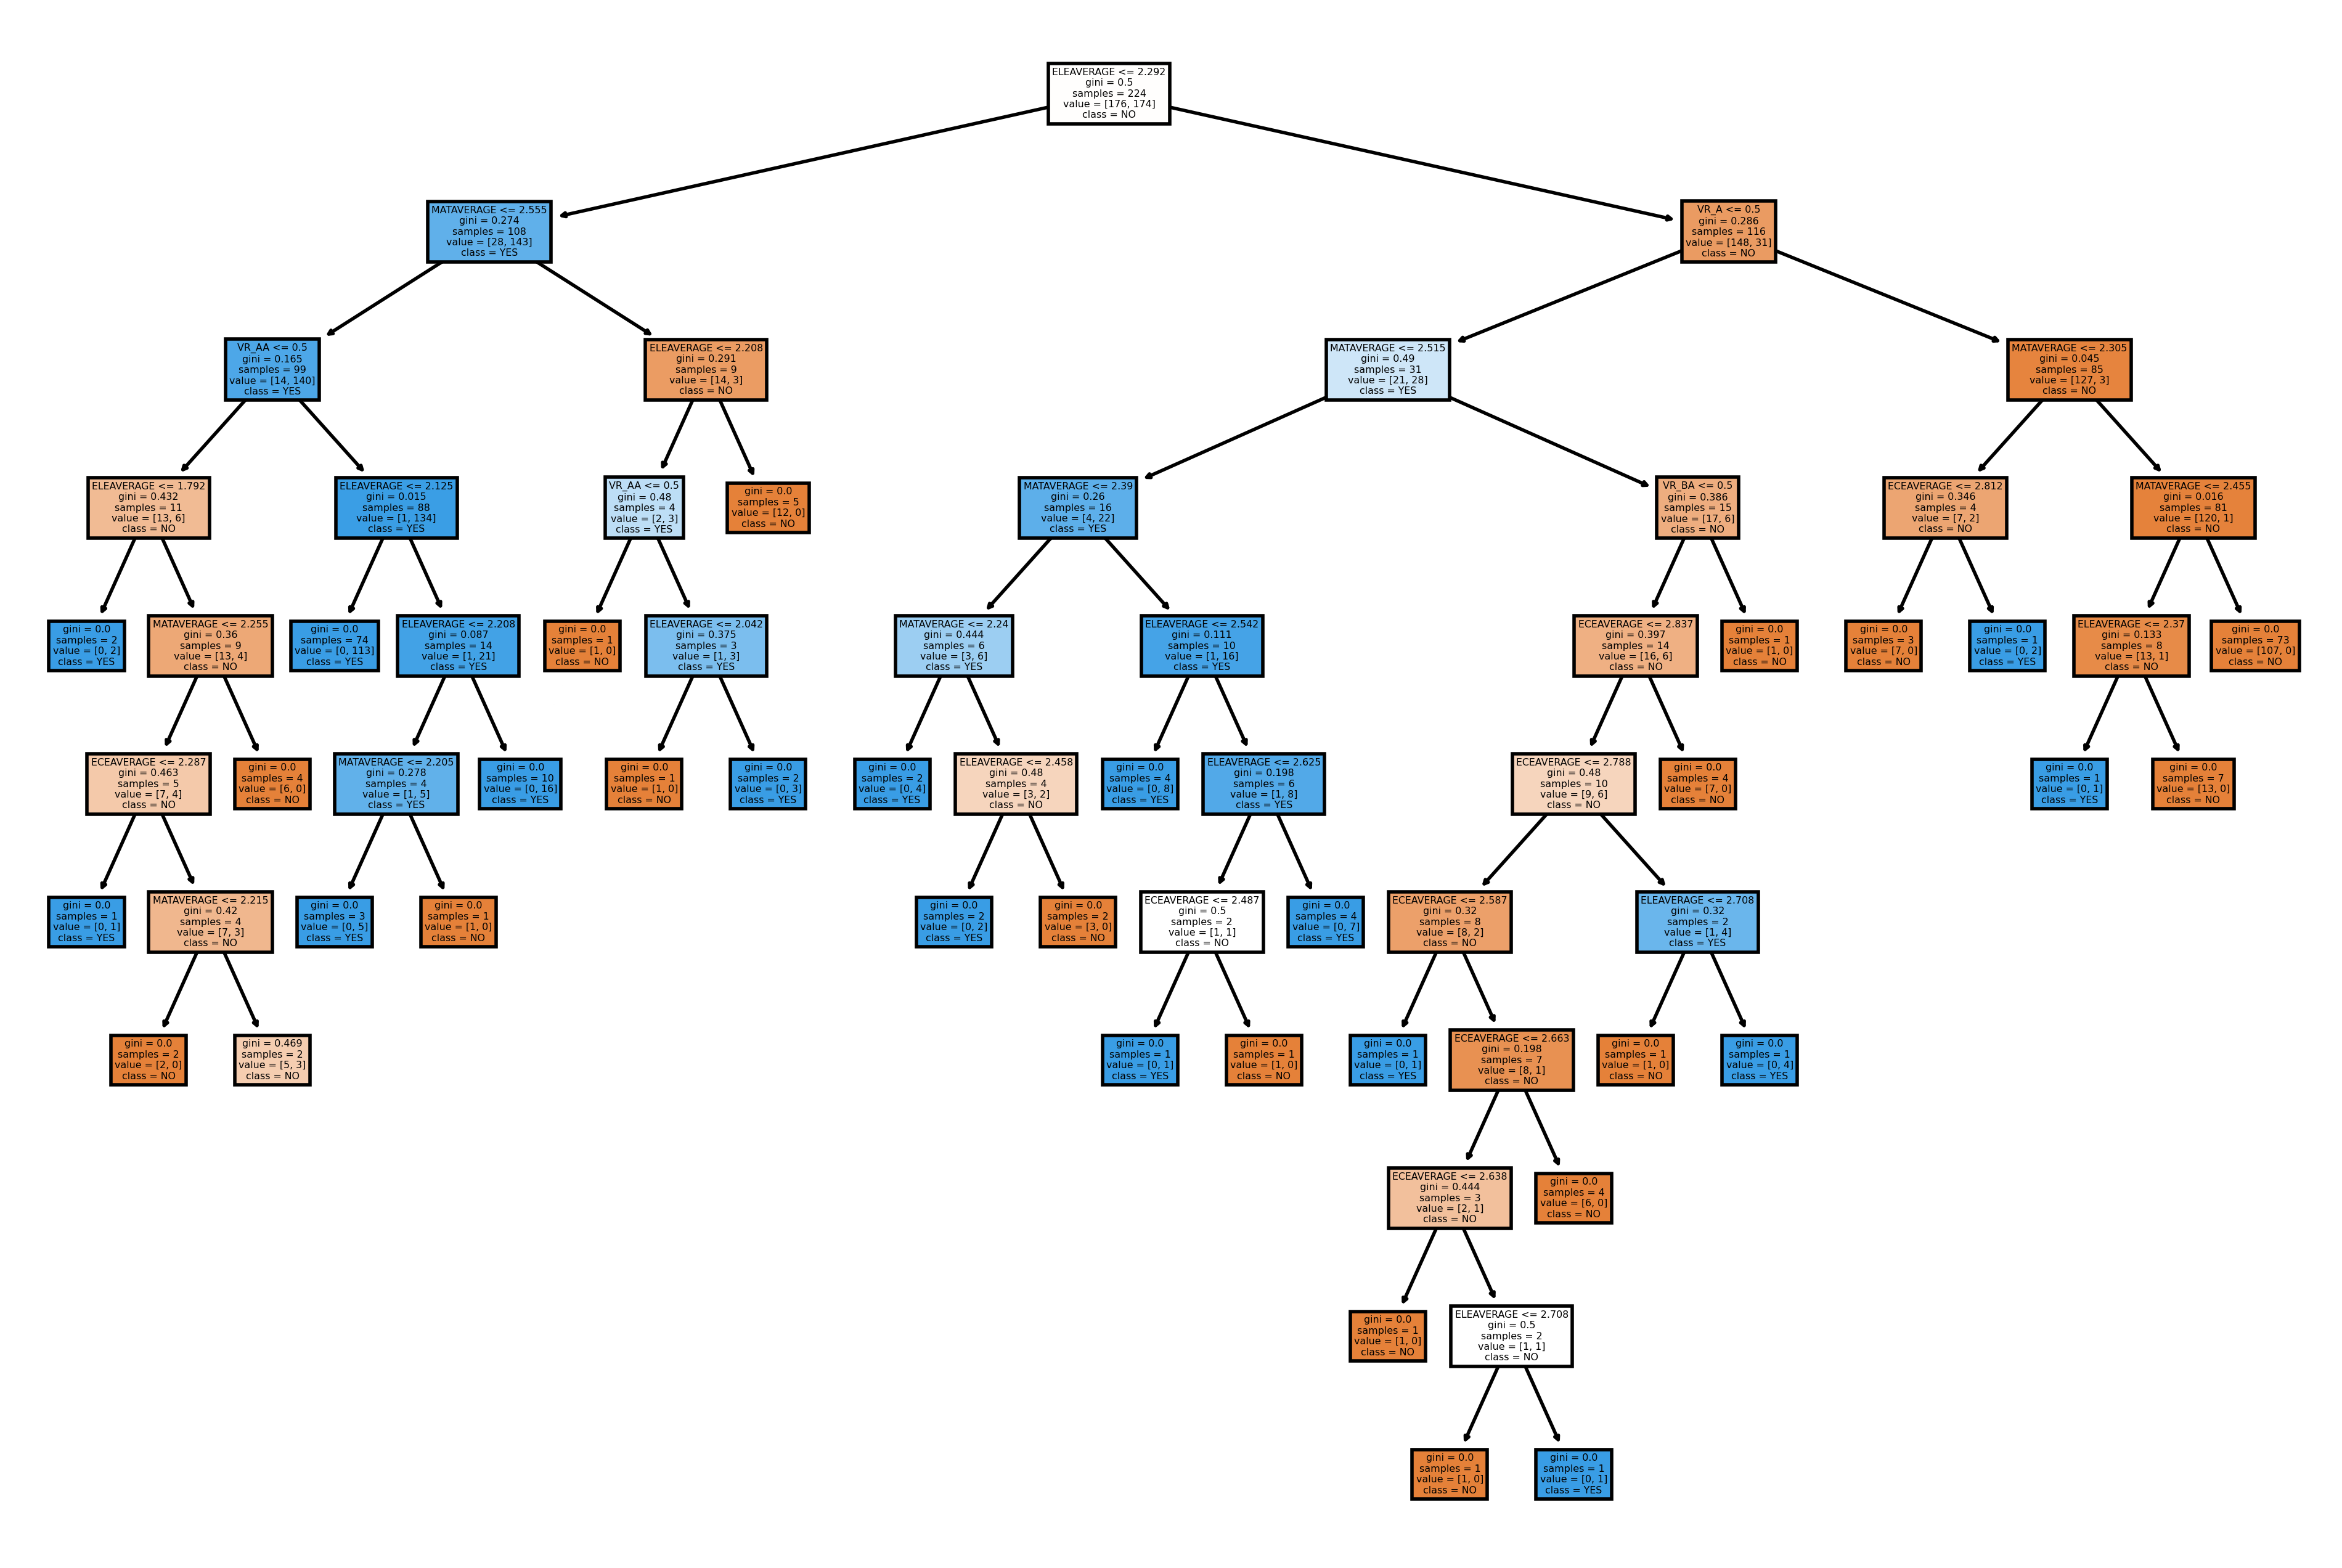

In [ ]:
# Project n_estimator = 0, figsize = (12,8), dpi = 400,
# plot_tree with class_names = ['NO', 'YES'] to better visualize the class

from sklearn.tree import plot_tree

plt.figure(figsize = (12, 8), dpi = 400)
plot_tree(model.estimators_[0], feature_names = X.columns, class_names = ['NO', 'YES'], filled = True)

[Text(0.40625, 0.95, 'VR_AA <= 0.5\ngini = 0.495\nsamples = 219\nvalue = [192, 158]\nclass = NO'),
 Text(0.13125, 0.85, 'MATAVERAGE <= 2.19\ngini = 0.149\nsamples = 112\nvalue = [159, 14]\nclass = NO'),
 Text(0.05, 0.75, 'MATAVERAGE <= 2.14\ngini = 0.32\nsamples = 4\nvalue = [2, 8]\nclass = YES'),
 Text(0.025, 0.65, 'gini = 0.0\nsamples = 1\nvalue = [2, 0]\nclass = NO'),
 Text(0.075, 0.65, 'gini = 0.0\nsamples = 3\nvalue = [0, 8]\nclass = YES'),
 Text(0.2125, 0.75, 'ECEAVERAGE <= 2.388\ngini = 0.071\nsamples = 108\nvalue = [157, 6]\nclass = NO'),
 Text(0.125, 0.65, 'ECEAVERAGE <= 2.188\ngini = 0.469\nsamples = 7\nvalue = [5, 3]\nclass = NO'),
 Text(0.1, 0.55, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = NO'),
 Text(0.15, 0.55, 'MATAVERAGE <= 2.39\ngini = 0.48\nsamples = 4\nvalue = [2, 3]\nclass = YES'),
 Text(0.125, 0.45, 'MATAVERAGE <= 2.305\ngini = 0.375\nsamples = 3\nvalue = [1, 3]\nclass = YES'),
 Text(0.1, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = YES'),
 Text(0

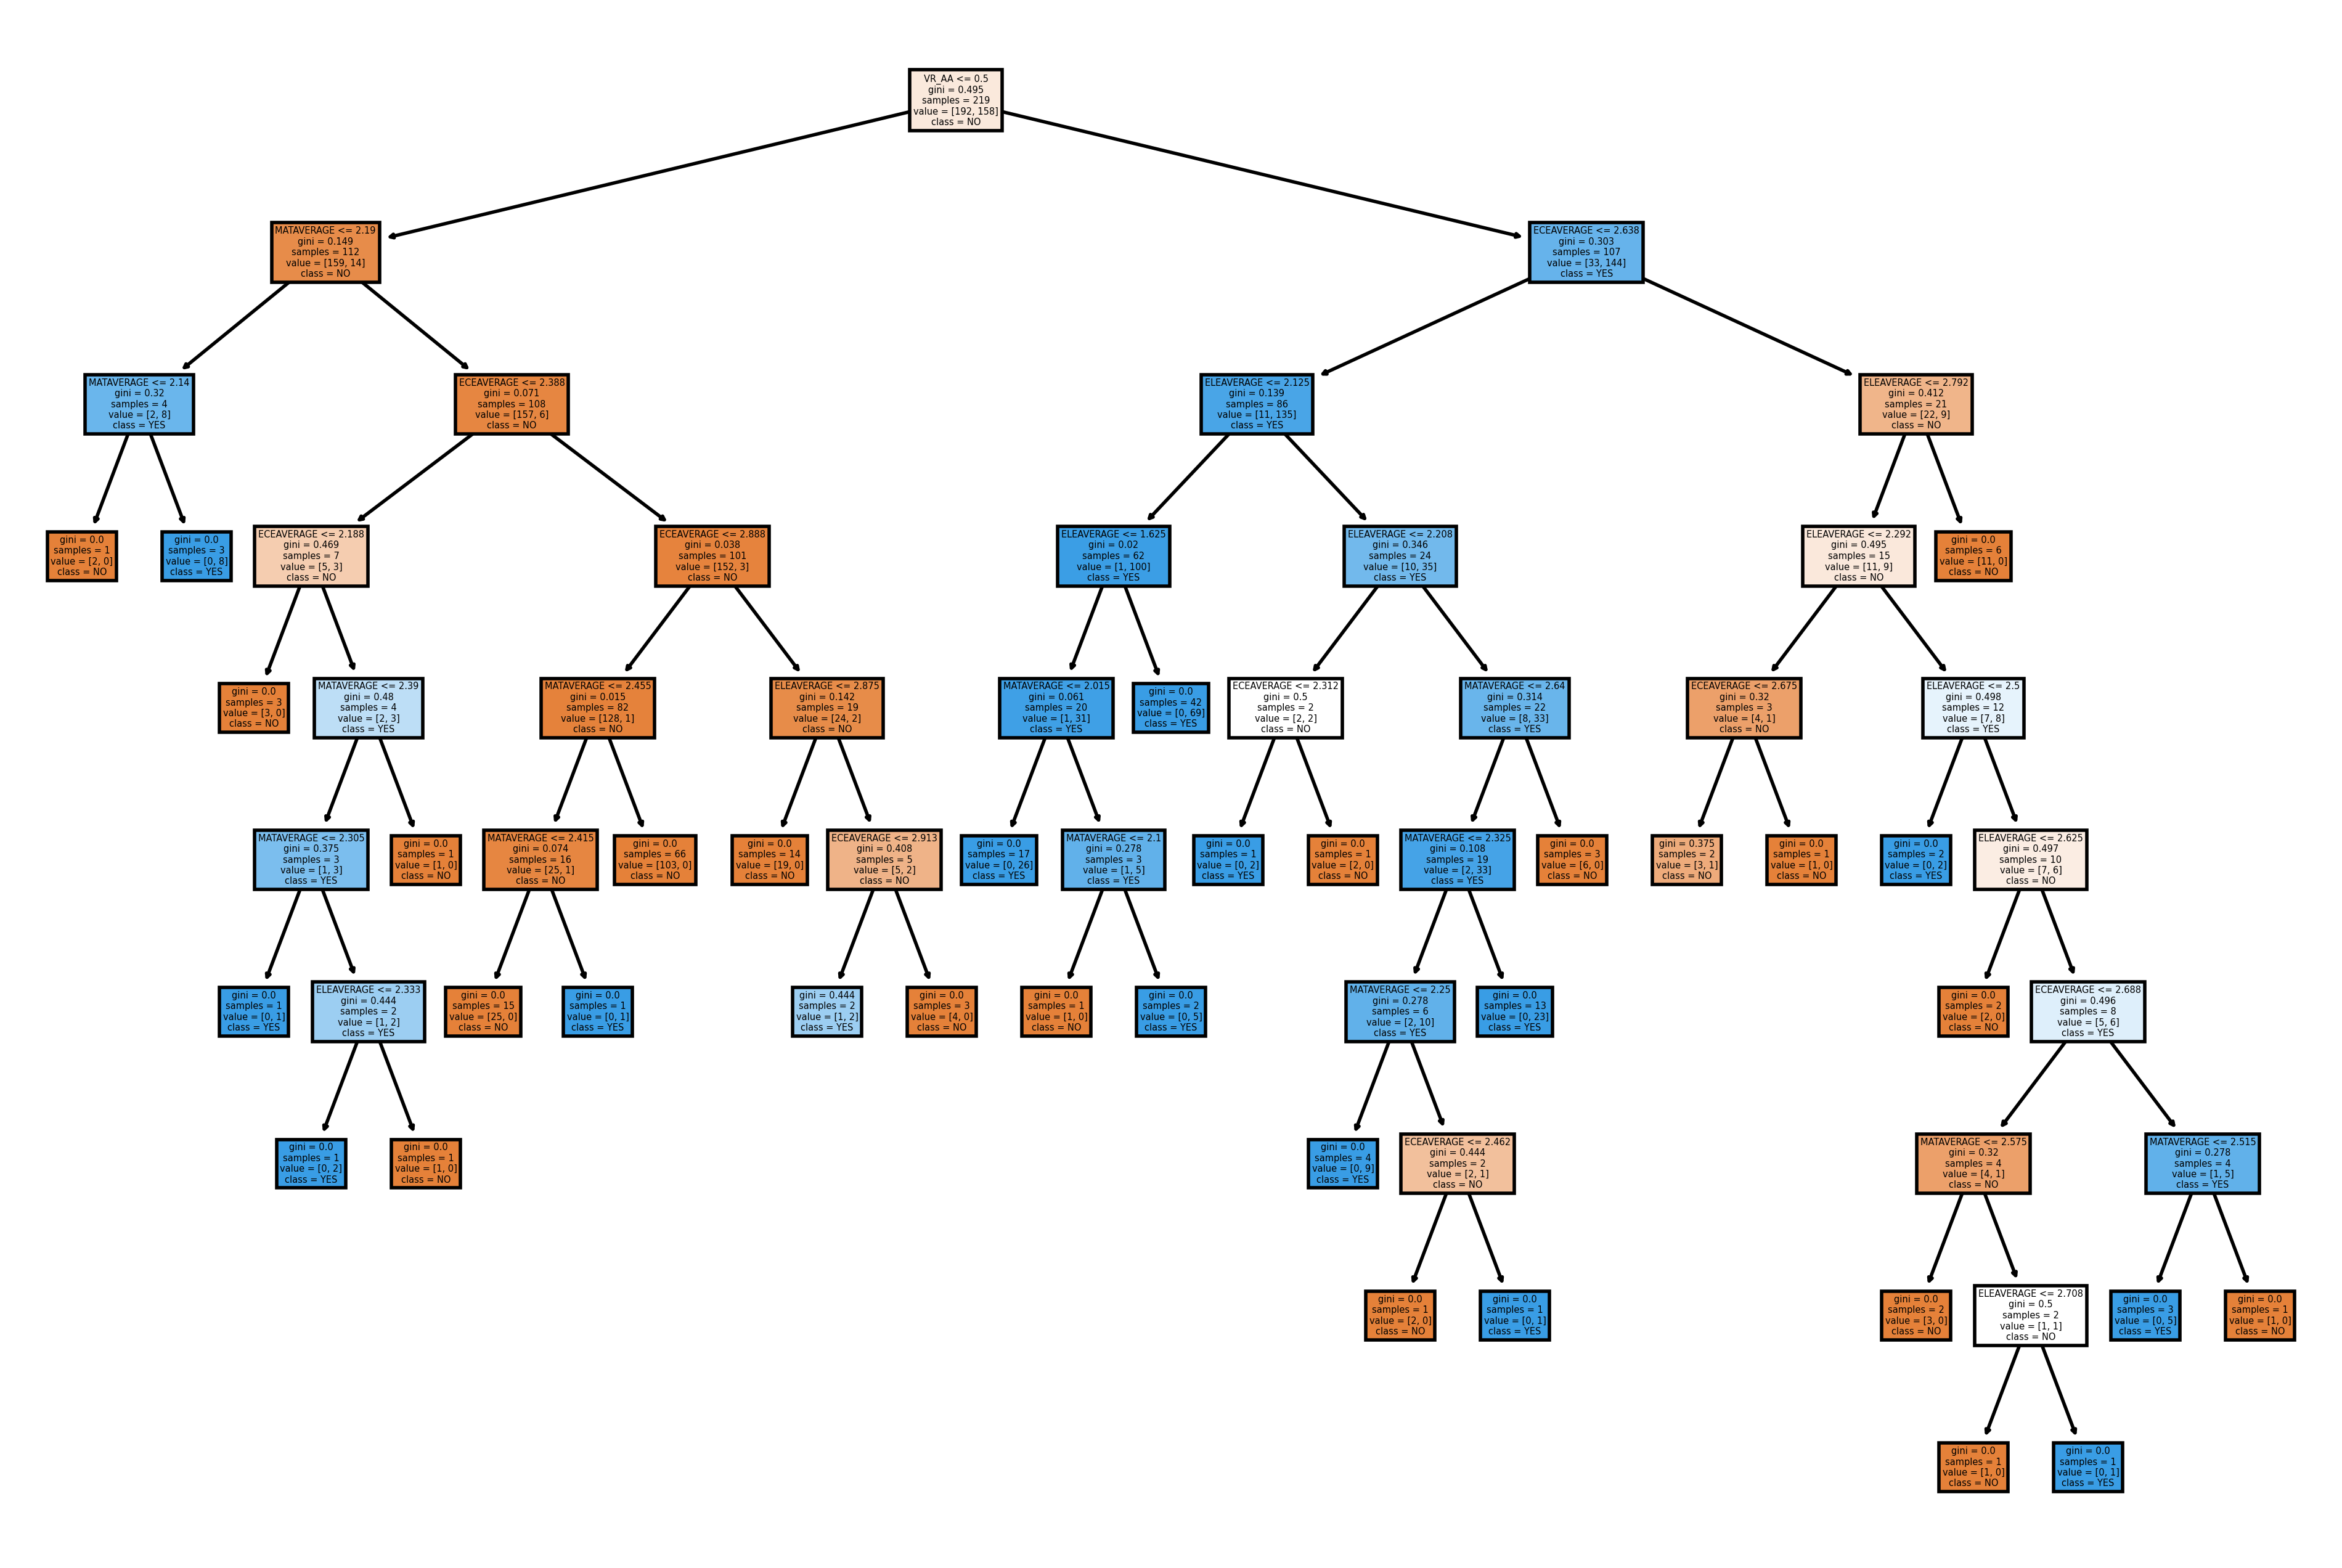

In [ ]:
# Project n_estimator = 10, figsize = (12,8), dpi = 400,
# plot_tree with class_names = ['NO', 'YES'] to better visualize the class

from sklearn.tree import plot_tree

plt.figure(figsize = (12, 8), dpi = 400)
plot_tree(model.estimators_[10], feature_names = X.columns, class_names = ['NO', 'YES'], filled = True)

[Text(0.6203703703703703, 0.95, 'VR_A <= 0.5\ngini = 0.5\nsamples = 219\nvalue = [173, 177]\nclass = YES'),
 Text(0.3888888888888889, 0.85, 'MATAVERAGE <= 2.515\ngini = 0.153\nsamples = 111\nvalue = [15, 165]\nclass = YES'),
 Text(0.2222222222222222, 0.75, 'ELEAVERAGE <= 2.458\ngini = 0.061\nsamples = 97\nvalue = [5, 155]\nclass = YES'),
 Text(0.07407407407407407, 0.65, 'ECEAVERAGE <= 2.362\ngini = 0.026\nsamples = 88\nvalue = [2, 147]\nclass = YES'),
 Text(0.037037037037037035, 0.55, 'gini = 0.0\nsamples = 68\nvalue = [0, 114]\nclass = YES'),
 Text(0.1111111111111111, 0.55, 'MATAVERAGE <= 2.24\ngini = 0.108\nsamples = 20\nvalue = [2, 33]\nclass = YES'),
 Text(0.07407407407407407, 0.45, 'gini = 0.0\nsamples = 8\nvalue = [0, 17]\nclass = YES'),
 Text(0.14814814814814814, 0.45, 'MATAVERAGE <= 2.455\ngini = 0.198\nsamples = 12\nvalue = [2, 16]\nclass = YES'),
 Text(0.1111111111111111, 0.35, 'ECEAVERAGE <= 2.388\ngini = 0.408\nsamples = 7\nvalue = [2, 5]\nclass = YES'),
 Text(0.07407407407

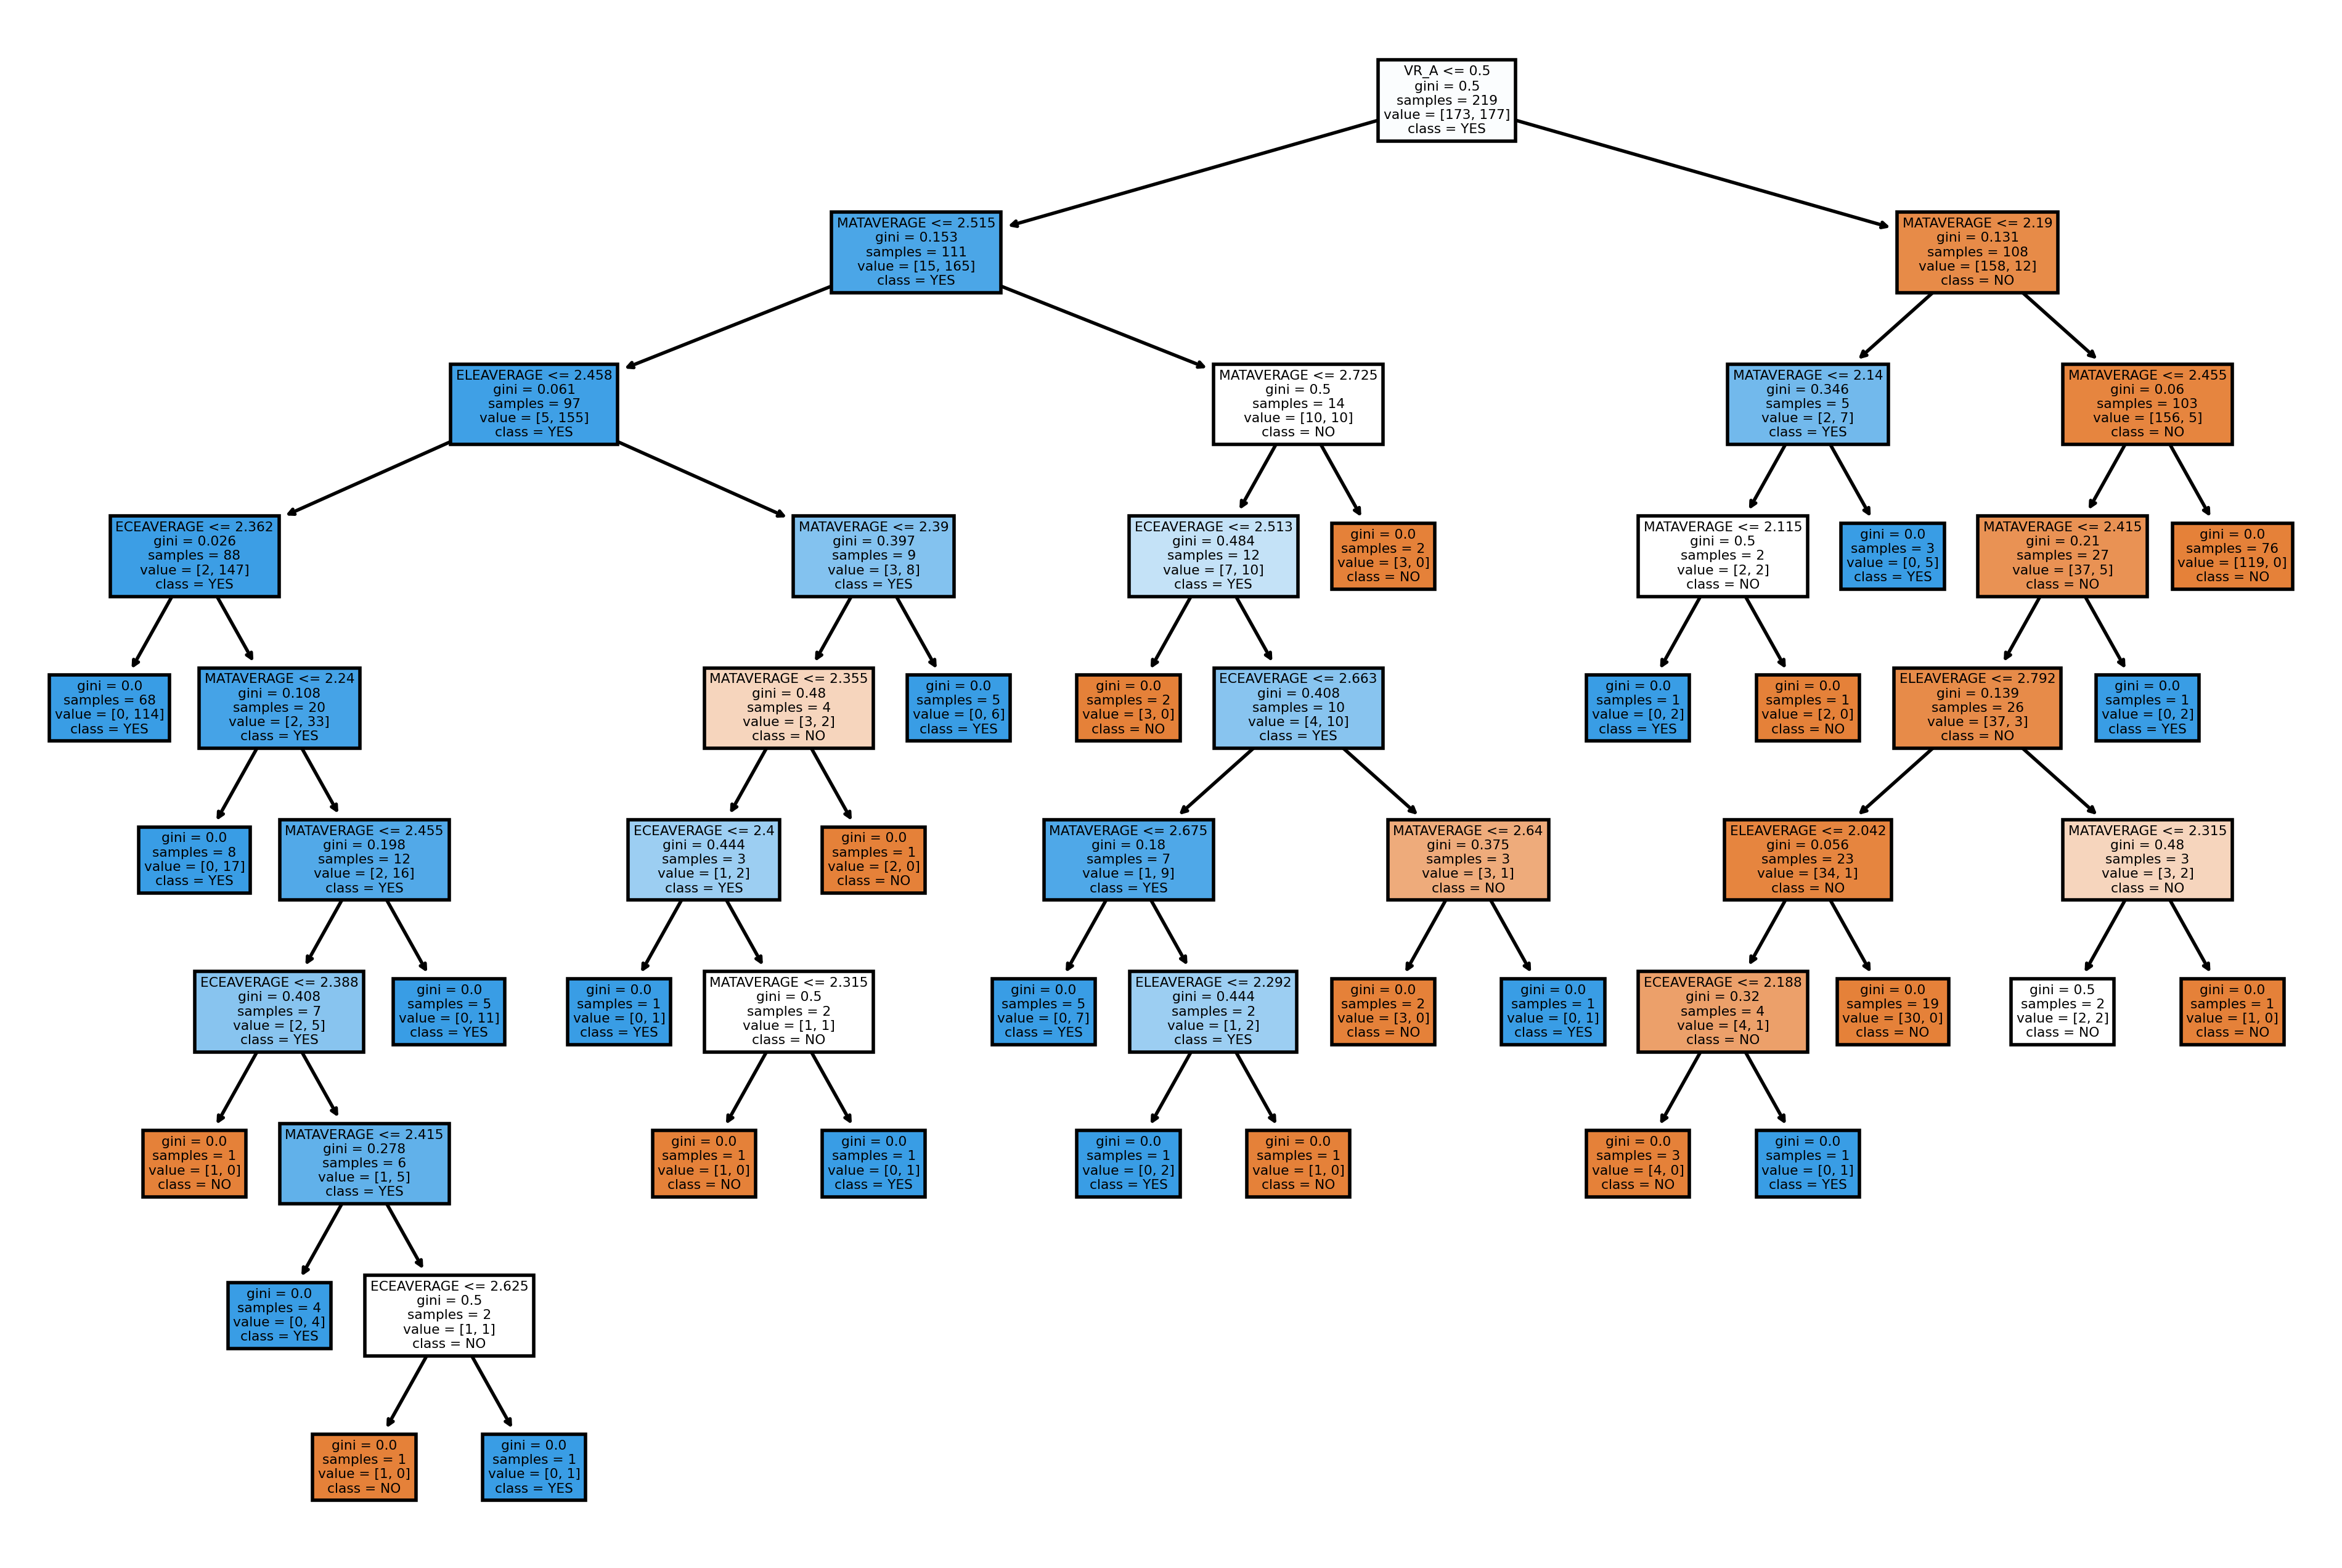

In [ ]:
# Project n_estimator = 15, figsize = (12,8), dpi = 400,
# plot_tree with class_names = ['NO', 'YES'] to better visualize the class

plt.figure(figsize = (12, 8), dpi = 400)
plot_tree(model.estimators_[15], feature_names = X.columns, class_names = ['NO', 'YES'], filled = True)

[Text(0.425, 0.95, 'VR_AA <= 0.5\ngini = 0.498\nsamples = 229\nvalue = [187, 163]\nclass = NO'),
 Text(0.18333333333333332, 0.85, 'ECEAVERAGE <= 2.362\ngini = 0.14\nsamples = 114\nvalue = [159, 13]\nclass = NO'),
 Text(0.11666666666666667, 0.75, 'MATAVERAGE <= 2.305\ngini = 0.444\nsamples = 7\nvalue = [3, 6]\nclass = YES'),
 Text(0.08333333333333333, 0.65, 'gini = 0.0\nsamples = 4\nvalue = [0, 6]\nclass = YES'),
 Text(0.15, 0.65, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = NO'),
 Text(0.25, 0.75, 'MATAVERAGE <= 2.455\ngini = 0.082\nsamples = 107\nvalue = [156, 7]\nclass = NO'),
 Text(0.21666666666666667, 0.65, 'ECEAVERAGE <= 2.812\ngini = 0.366\nsamples = 18\nvalue = [22, 7]\nclass = NO'),
 Text(0.13333333333333333, 0.55, 'ECEAVERAGE <= 2.525\ngini = 0.269\nsamples = 16\nvalue = [21, 4]\nclass = NO'),
 Text(0.06666666666666667, 0.45, 'MATAVERAGE <= 2.19\ngini = 0.375\nsamples = 8\nvalue = [9, 3]\nclass = NO'),
 Text(0.03333333333333333, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [0,

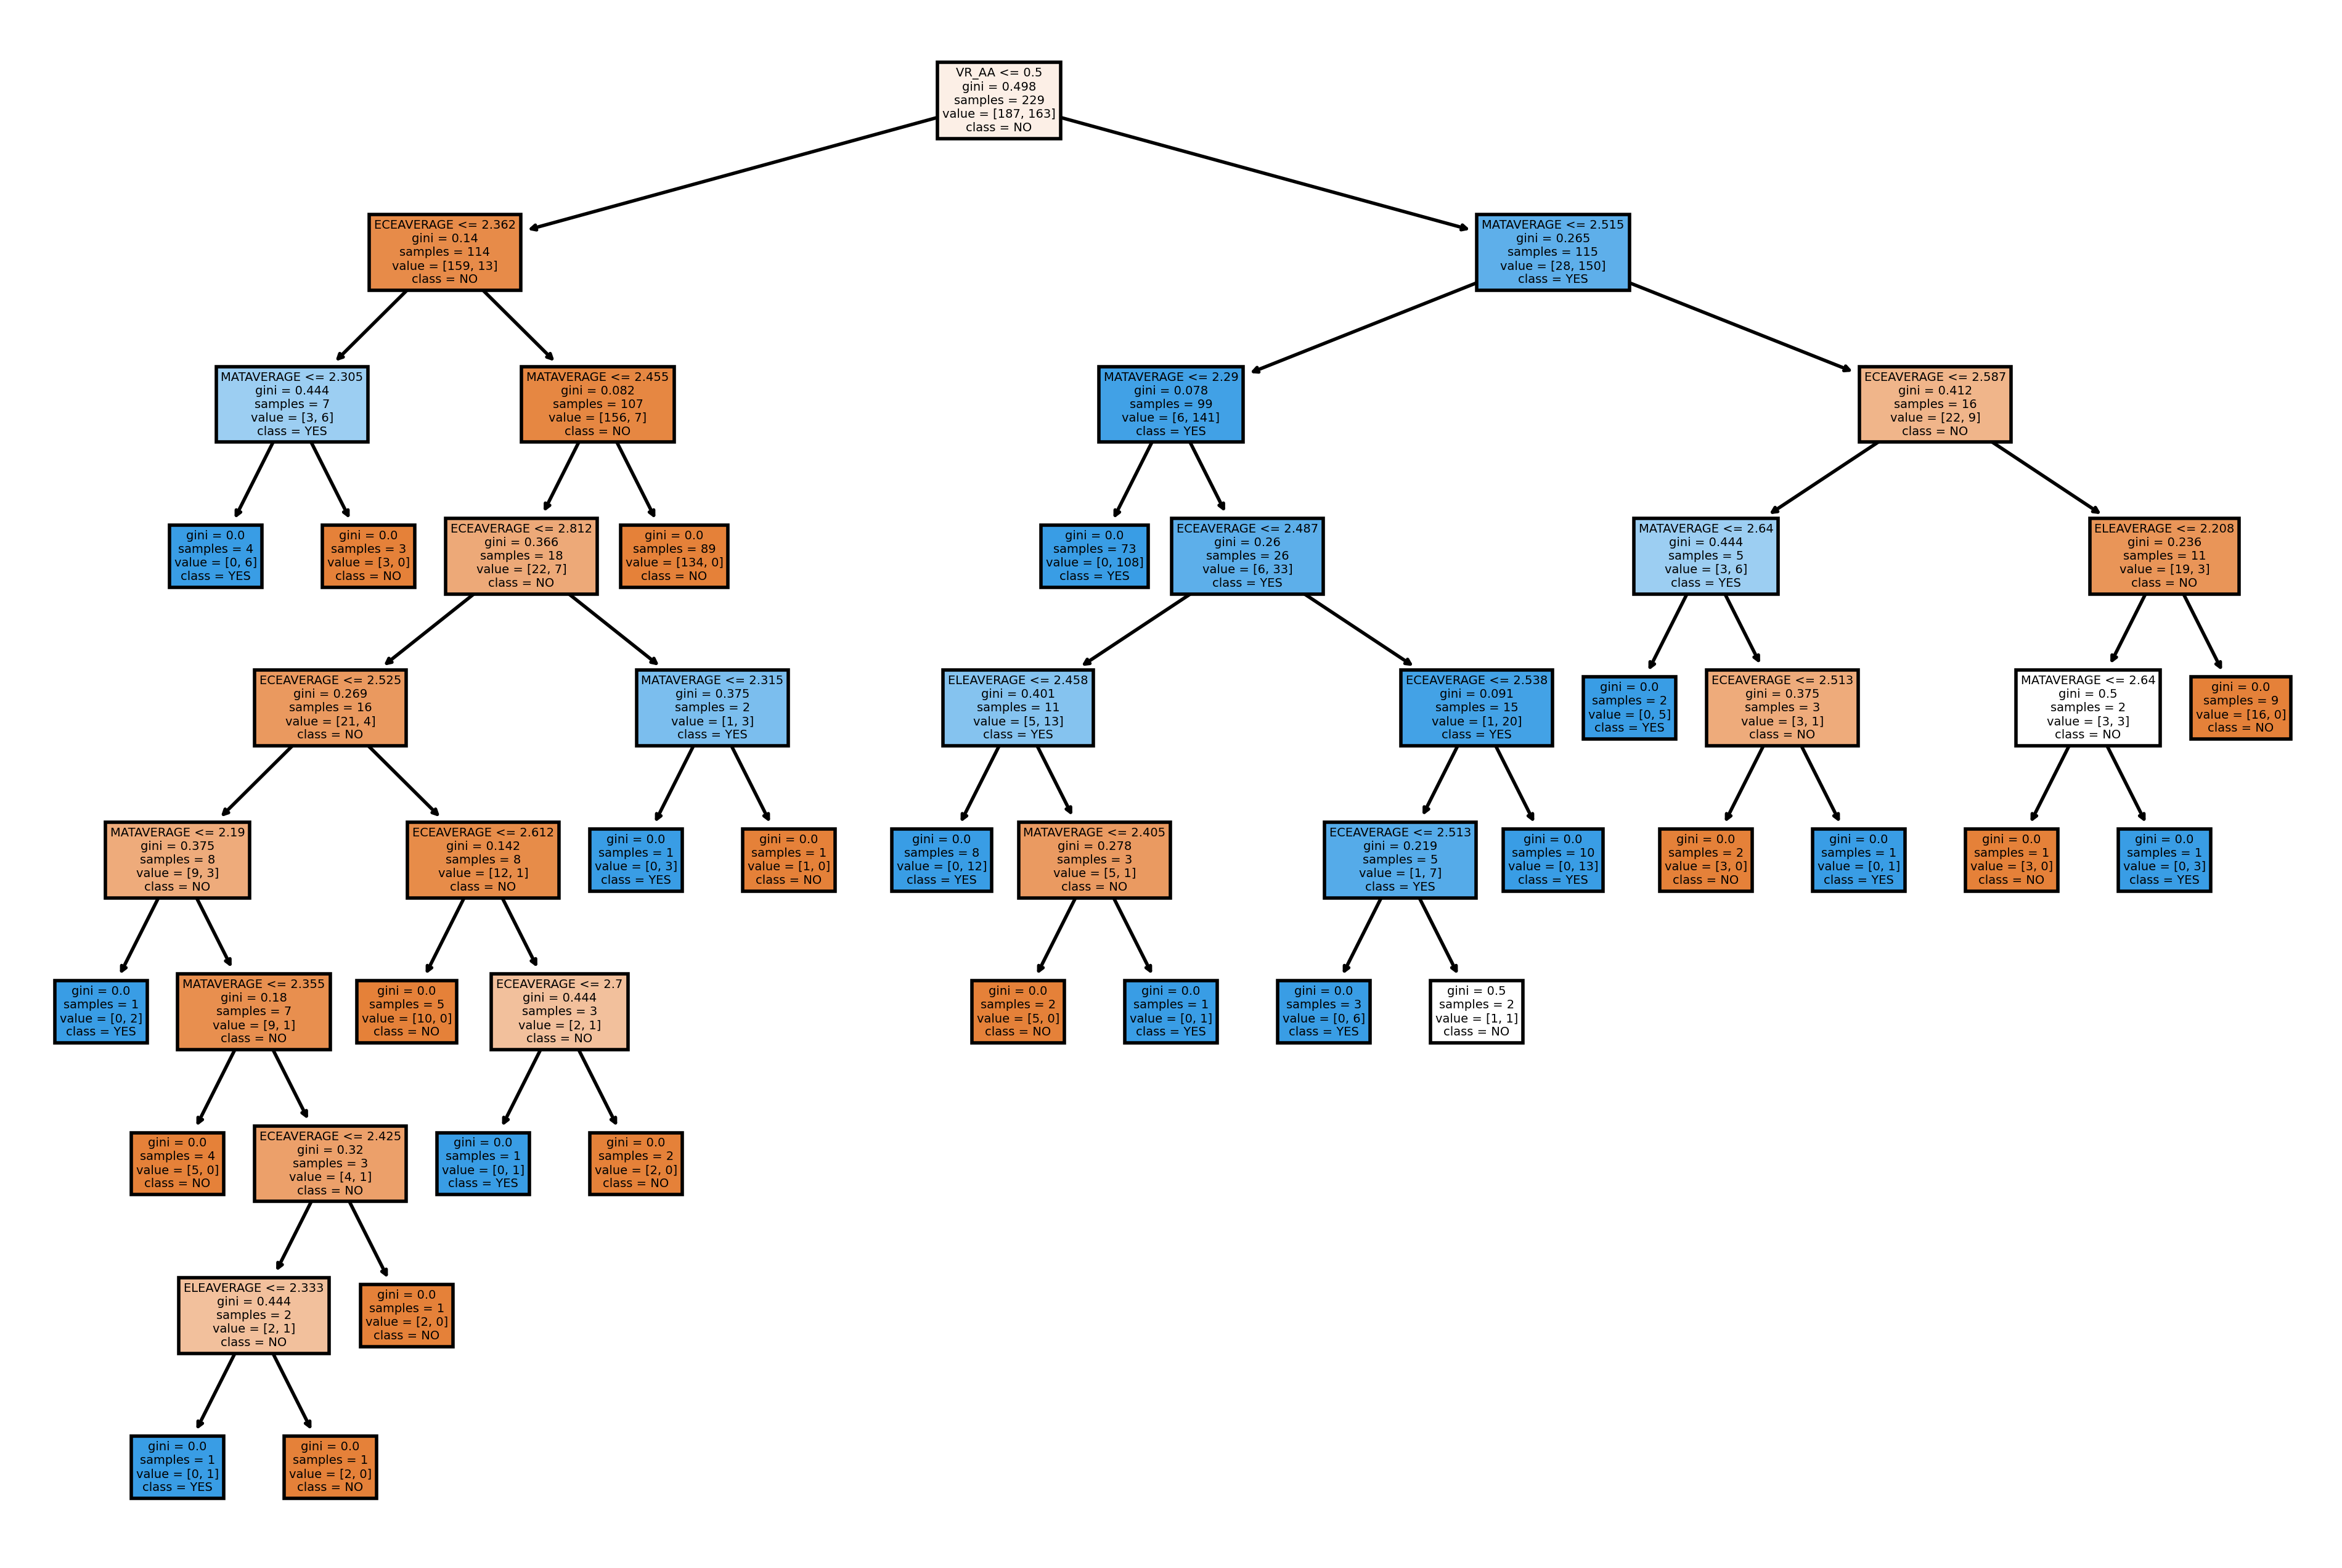

In [ ]:
# Project n_estimator = 20, figsize = (12,8), dpi = 400,
# plot_tree with class_names = ['NO', 'YES'] to better visualize the class

plt.figure(figsize = (12, 8), dpi = 400)
plot_tree(model.estimators_[20], feature_names = X.columns, class_names = ['NO', 'YES'], filled = True)

Decision Boundary for MATAVERAGE & ECEAVERAGE

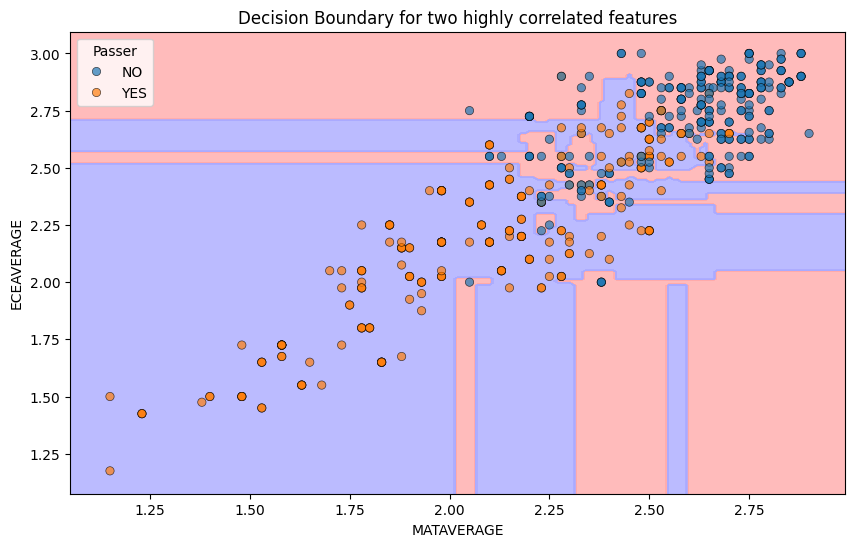

In [ ]:
from matplotlib.colors import ListedColormap


# Selecting only the two highly correlated features and the target
a = data[[ 'MATAVERAGE', 'ECEAVERAGE']]
b = data['Passer'].apply(lambda x: 1 if x == 'YES' else 0) # Encoding 'Passer' to numerical values

# Train a Random Forest Classifier
model = RandomForestClassifier (bootstrap =True, max_features = 3, n_estimators = 50, oob_score = True, random_state = 9)
model.fit(a, b)

# Plotting decision boundaries

x_min, x_max = a['MATAVERAGE'].min() -0.1, a['MATAVERAGE'].max() + 0.1
y_min, y_max= a['ECEAVERAGE'].min() - 0.1, a['ECEAVERAGE'].max() + 0.1
xx, yy = np.meshgrid (np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
sns.scatterplot(x = 'MATAVERAGE', y = 'ECEAVERAGE', hue='Passer', data = data, edgecolor='k', alpha=0.7)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Decision Boundary for two highly correlated features')
plt.xlabel('MATAVERAGE')
plt.ylabel('ECEAVERAGE')
plt.show()